In [9]:
from skimage import color, io, measure, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

In [3]:
im_org = io.imread('data/vertebra.png')

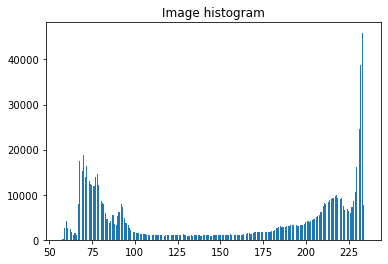

In [4]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

In [6]:
print(np.min(im_org), np.max(im_org))

57 235


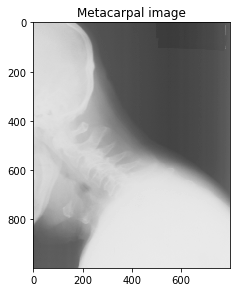

In [8]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

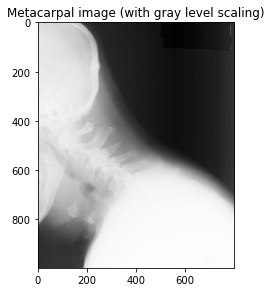

In [7]:
io.imshow(im_org, vmin=np.min(im_org), vmax=np.max(im_org))
plt.title('Metacarpal image (with gray level scaling)')
io.show()

0.22352941176470587 0.9215686274509803


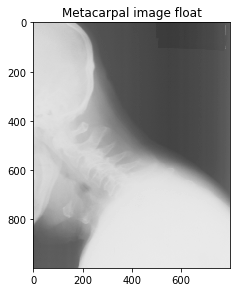

In [12]:
floatimg = img_as_float(im_org)
print(np.min(floatimg), np.max(floatimg))
io.imshow(floatimg)
plt.title('Metacarpal image float')
io.show()

In [15]:
print(floatimg == im_org/255)

[[ True  True  True ...  True  True False]
 [False  True  True ...  True  True False]
 [False  True False ...  True  True False]
 ...
 [False False  True ...  True  True  True]
 [ True False  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


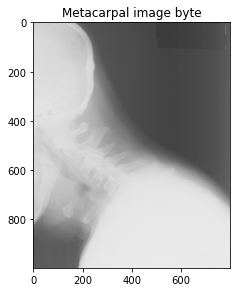

57 235


In [18]:
byteimg = img_as_ubyte(floatimg)
io.imshow(byteimg)
plt.title('Metacarpal image byte')
io.show()
print(np.min(byteimg), np.max(byteimg))

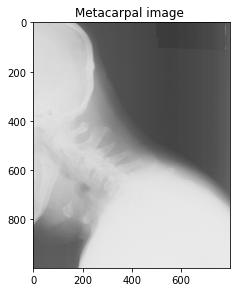

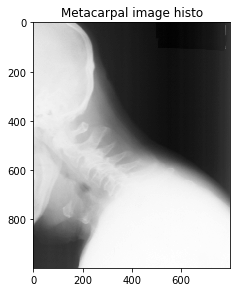

In [22]:
def histogram_stretch(img_in):
    """
    Stretches the histogram of an image 
    :param img_in: Input image
    :return: Image, where the histogram is stretched so the min values is 0 and the maximum value 255
    """
    # img_as_float will divide all pixel values with 255.0
    img_float = img_as_float(img_in)
    min_val = img_float.min()
    max_val = img_float.max()
    min_desired = 0.0
    max_desired = 1.0
    img_out = 1/(max_val - min_val) * (img_float - min_val)
	
    # Do something here

    # img_as_ubyte will multiply all pixel values with 255.0 before converting to unsigned byte
    return img_as_ubyte(img_out)
testimg = histogram_stretch(im_org)
io.imshow(im_org)
plt.title('Metacarpal image ')
io.show()
io.imshow(testimg)
plt.title('Metacarpal image histo')
io.show()

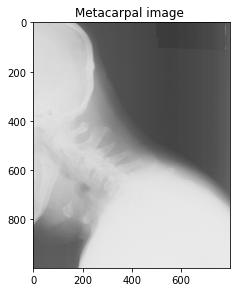

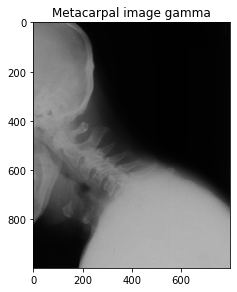

In [26]:
def gamma_map(img, gamma):
    img_float = img_as_float(img)
    img_out = np.power(img_float,gamma)
    return img_as_ubyte(img_out)

gammaimg = gamma_map(im_org, 4)
io.imshow(im_org)
plt.title('Metacarpal image ')
io.show()
io.imshow(gammaimg)
plt.title('Metacarpal image gamma')
io.show()

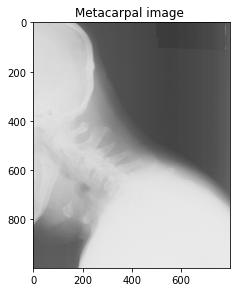

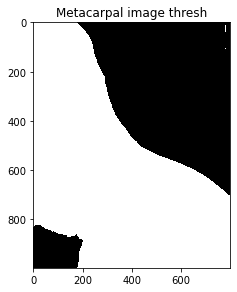

In [30]:
def threshold_image(img_in, thres):
    """
    Apply a threshold in an image and return the resulting image
    :param img_in: Input image
    :param thres: The treshold value in the range [0, 255]
    :return: Resulting image (unsigned byte) where background is 0 and foreground is 255
    """
    mask = img_in > thres
    return img_as_ubyte(mask)
timg = threshold_image(im_org, 110)
io.imshow(im_org)
plt.title('Metacarpal image ')
io.show()
io.imshow(timg)
plt.title('Metacarpal image thresh')
io.show()

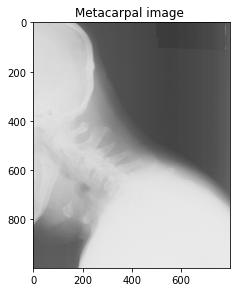

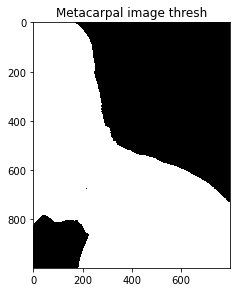

148


In [33]:
from skimage.filters import threshold_otsu
testa = threshold_otsu(im_org)
timg = threshold_image(im_org,testa)
io.imshow(im_org)
plt.title('Metacarpal image ')
io.show()
io.imshow(timg)
plt.title('Metacarpal image thresh')
io.show()
print(testa)

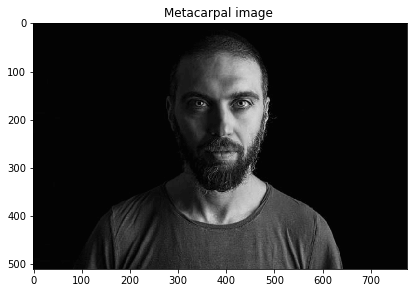

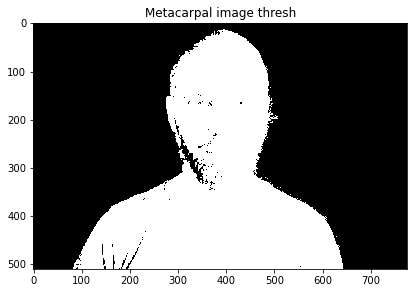

58


In [37]:
from skimage.color import rgb2gray
im_cam = io.imread('data/dark_background.png')
im_cam = img_as_float(im_cam)
im_gray = img_as_ubyte(rgb2gray(im_cam))
testa = threshold_otsu(im_gray)
timg = threshold_image(im_gray,5)
io.imshow(im_gray)
plt.title('Metacarpal image ')
io.show()
io.imshow(timg)
plt.title('Metacarpal image thresh')
io.show()
print(testa)

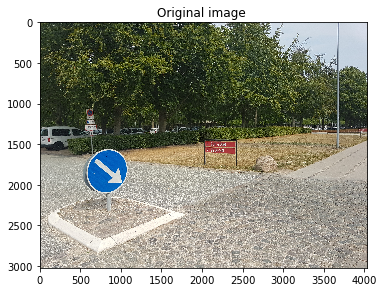

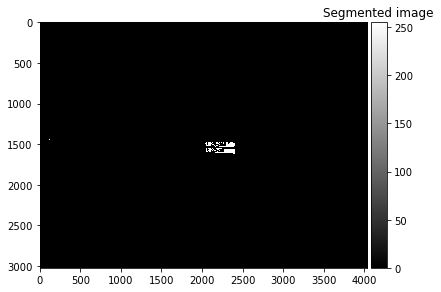

In [67]:
def detect_dtu_signs(img, sign):
    r_comp = img[:, :, 0]
    g_comp = img[:, :, 1]
    b_comp = img[:, :, 2]
    if sign == 'blue':
        segm = (r_comp < 10) & (g_comp > 85) & (g_comp < 105) & \
                (b_comp > 180) & (b_comp < 200)
    elif sign == 'red':
        segm = (r_comp > 160) & (r_comp < 180) & (g_comp > 50) & (g_comp < 80) & \
                    (b_comp > 50) & (b_comp < 80)
    return img_as_ubyte(segm)
im_dtu = io.imread('data/DTUSigns2.jpg')
imnew = detect_dtu_signs(im_dtu, 'red')
io.imshow(im_dtu)
plt.title('Original image ')
io.show()
io.imshow(imnew, vmin = 0, vmax = 255, cmap = 'gray')
plt.title('Segmented image')
io.show()

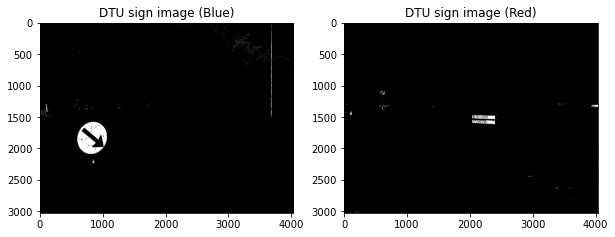

In [98]:
from skimage import color

def detect_dtu_signs2(img, sign):
    hsv_img = color.rgb2hsv(img)
    hue_img = hsv_img[:, :, 0]
    value_img = hsv_img[:, :, 2]
    if sign == 'blue':
        segm = (hue_img < 0.6) & (hue_img > 0.4) & (value_img > 0.7) & (value_img < 0.77)
    elif sign == 'red':
        segm = (hue_img < 1.0) & (hue_img > 0.9)
    return segm

segm_blue = detect_dtu_signs2(im_dtu,'blue')
segm_red = detect_dtu_signs2(im_dtu,'red')
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(segm_blue, cmap = 'gray')
ax1.set_title('DTU sign image (Blue)')

ax2.imshow(segm_red, cmap = 'gray')
ax2.set_title('DTU sign image (Red)')
plt.show()

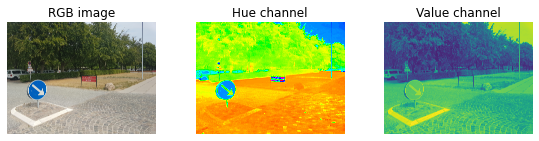

In [83]:
hsv_img = color.rgb2hsv(im_dtu)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))
ax0.imshow(im_dtu)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv', vmin = np.min(hue_img), vmax= np.max(hue_img))
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')
fig.tight_layout()
io.show()

In [102]:
!python data/Ex3-VideoPixelWiseOperations.py

^C


[ERROR:0@73.798] global cap.cpp:166 cv::VideoCapture::open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\videoio\src\cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): http://192.168.1.120:4747/video in function 'cv::icvExtractPattern'


[tcp @ 000001cbff0fbc00] Connection to tcp://192.168.1.120:4747 failed: Error number -138 occurred


Starting image capture
Opening connection to camera
Cannot open camera
